In [1]:
ls

Untitled.ipynb                    data.csv
breast-cancer-wisconsin-data.zip


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [84]:
skew = []
for i in (train.columns):
     skew.append(train[i].skew())

In [94]:
pd.DataFrame({'skew':skew}, index=train.columns).sort_values(by='skew', ascending=False)

,skew
area_se,5.447186
concavity_se,5.110463
fractal_dimension_se,3.923969
perimeter_se,3.443615
radius_se,3.088612
smoothness_se,2.314450
symmetry_se,2.195133
compactness_se,1.902221
area_worst,1.859373
fractal_dimension_worst,1.662579


In [5]:
data.shape

(569, 33)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [25]:
train = data.copy()

In [26]:
train = train.drop(['Unnamed: 32', 'id'], axis=1)

In [35]:
target = train.diagnosis
train = train.drop('diagnosis', axis=1)

In [33]:
target.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [61]:
model = RandomForestClassifier(n_estimators=100)

In [63]:
def cv(model):
    stratifiedkfold = StratifiedKFold(n_splits=5)
    score = cross_val_score(model, train, target, cv=stratifiedkfold)
    score = score.mean()
    return(score)

In [64]:
cv(model)

0.9544747979992305

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113013828>]],
      dtype=object)

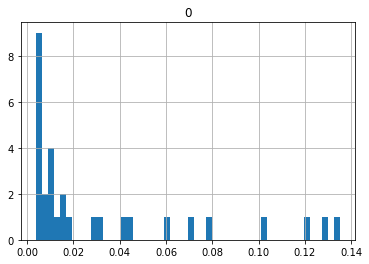

In [78]:
import matplotlib as plt

model.fit(train, target)
importances = model.feature_importances_
pd.DataFrame(importances).hist(bins=50)

In [82]:
temp = pd.DataFrame({'columns':train.columns, 'importance':importances})
temp

,columns,importance
0,radius_mean,0.043646
1,texture_mean,0.016708
2,perimeter_mean,0.061146
3,area_mean,0.032044
4,smoothness_mean,0.006110
5,compactness_mean,0.011222
6,concavity_mean,0.069865
7,concave points_mean,0.119736
8,symmetry_mean,0.003950
9,fractal_dimension_mean,0.003948
